In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

627

In [5]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [7]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | taoudenni
Processing Record 2 of Set 1 | new norfolk
Processing Record 3 of Set 1 | ostrovnoy
Processing Record 4 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 5 of Set 1 | albany
Processing Record 6 of Set 1 | mar del plata
Processing Record 7 of Set 1 | cape town
Processing Record 8 of Set 1 | busselton
Processing Record 9 of Set 1 | punta arenas
Processing Record 10 of Set 1 | vaini
Processing Record 11 of Set 1 | quatre cocos
Processing Record 12 of Set 1 | saleaula
City not found. Skipping...
Processing Record 13 of Set 1 | lebu
Processing Record 14 of Set 1 | buin
Processing Record 15 of Set 1 | carbonia
Processing Record 16 of Set 1 | rio grande
Processing Record 17 of Set 1 | palmer
Processing Record 18 of Set 1 | port-gentil
Processing Record 19 of Set 1 | hobart
Processing Record 20 of Set 1 | bangui
Processing Record 21 of Set 1 | saldanha
Processing Record 22 of S

Processing Record 38 of Set 4 | darien
Processing Record 39 of Set 4 | starokucherganovka
Processing Record 40 of Set 4 | nizhneyansk
City not found. Skipping...
Processing Record 41 of Set 4 | ambovombe
Processing Record 42 of Set 4 | colac
Processing Record 43 of Set 4 | buraydah
Processing Record 44 of Set 4 | severnyy
Processing Record 45 of Set 4 | jalu
Processing Record 46 of Set 4 | svetlogorsk
Processing Record 47 of Set 4 | boffa
Processing Record 48 of Set 4 | sergeyevka
Processing Record 49 of Set 4 | fortuna
Processing Record 50 of Set 4 | sorong
Processing Record 1 of Set 5 | natalinsk
Processing Record 2 of Set 5 | high level
Processing Record 3 of Set 5 | acapulco
Processing Record 4 of Set 5 | kavaratti
Processing Record 5 of Set 5 | tuatapere
Processing Record 6 of Set 5 | peniche
Processing Record 7 of Set 5 | tiksi
Processing Record 8 of Set 5 | smithers
Processing Record 9 of Set 5 | shouguang
Processing Record 10 of Set 5 | amderma
City not found. Skipping...
Proce

Processing Record 28 of Set 8 | balykshi
Processing Record 29 of Set 8 | tongling
Processing Record 30 of Set 8 | kommunisticheskiy
Processing Record 31 of Set 8 | norrkoping
Processing Record 32 of Set 8 | ballina
Processing Record 33 of Set 8 | gore
Processing Record 34 of Set 8 | gamba
Processing Record 35 of Set 8 | xiongshi
City not found. Skipping...
Processing Record 36 of Set 8 | doctor pedro p. pena
City not found. Skipping...
Processing Record 37 of Set 8 | asau
Processing Record 38 of Set 8 | berlevag
Processing Record 39 of Set 8 | boa vista
Processing Record 40 of Set 8 | linxia
Processing Record 41 of Set 8 | hereford
Processing Record 42 of Set 8 | faanui
Processing Record 43 of Set 8 | bathsheba
Processing Record 44 of Set 8 | ndola
Processing Record 45 of Set 8 | figeac
Processing Record 46 of Set 8 | walvis bay
Processing Record 47 of Set 8 | ha tinh
Processing Record 48 of Set 8 | ayan
Processing Record 49 of Set 8 | dwarka
Processing Record 50 of Set 8 | indiana
Pro

Processing Record 16 of Set 12 | teguise
Processing Record 17 of Set 12 | atherton
Processing Record 18 of Set 12 | santiago del estero
Processing Record 19 of Set 12 | grand river south east
City not found. Skipping...
Processing Record 20 of Set 12 | poya
Processing Record 21 of Set 12 | fengzhen
Processing Record 22 of Set 12 | sioux lookout
Processing Record 23 of Set 12 | rassvet
Processing Record 24 of Set 12 | alvorada
Processing Record 25 of Set 12 | noumea
Processing Record 26 of Set 12 | biu
Processing Record 27 of Set 12 | pringsewu
Processing Record 28 of Set 12 | avera
Processing Record 29 of Set 12 | chicama
Processing Record 30 of Set 12 | keti bandar
Processing Record 31 of Set 12 | koungheul
Processing Record 32 of Set 12 | yerbogachen
Processing Record 33 of Set 12 | westport
Processing Record 34 of Set 12 | salvador
Processing Record 35 of Set 12 | carauari
Processing Record 36 of Set 12 | maniitsoq
Processing Record 37 of Set 12 | athabasca
Processing Record 38 of S

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Taoudenni,22.6783,-3.9836,88.20,15,0,16.96,ML,2022-04-26 18:15:35
1,New Norfolk,-42.7826,147.0587,48.90,88,100,1.95,AU,2022-04-26 18:15:36
2,Ostrovnoy,68.0531,39.5131,21.58,69,100,18.07,RU,2022-04-26 18:15:36
3,Albany,42.6001,-73.9662,54.39,84,100,1.88,US,2022-04-26 18:15:37
4,Mar Del Plata,-38.0023,-57.5575,71.62,93,75,14.97,AR,2022-04-26 18:12:17
5,Cape Town,-33.9258,18.4232,61.27,71,0,17.27,ZA,2022-04-26 18:13:10
6,Busselton,-33.6500,115.3333,57.24,86,99,1.72,AU,2022-04-26 18:14:06
7,Punta Arenas,-53.1500,-70.9167,42.91,63,75,10.36,CL,2022-04-26 18:12:20
8,Vaini,-21.2000,-175.2000,73.56,73,20,8.05,TO,2022-04-26 18:15:38
9,Quatre Cocos,-20.2078,57.7625,77.11,79,22,12.01,MU,2022-04-26 18:15:38


In [10]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Taoudenni,ML,2022-04-26 18:15:35,22.6783,-3.9836,88.20,15,0,16.96
1,New Norfolk,AU,2022-04-26 18:15:36,-42.7826,147.0587,48.90,88,100,1.95
2,Ostrovnoy,RU,2022-04-26 18:15:36,68.0531,39.5131,21.58,69,100,18.07
3,Albany,US,2022-04-26 18:15:37,42.6001,-73.9662,54.39,84,100,1.88
4,Mar Del Plata,AR,2022-04-26 18:12:17,-38.0023,-57.5575,71.62,93,75,14.97
5,Cape Town,ZA,2022-04-26 18:13:10,-33.9258,18.4232,61.27,71,0,17.27
6,Busselton,AU,2022-04-26 18:14:06,-33.6500,115.3333,57.24,86,99,1.72
7,Punta Arenas,CL,2022-04-26 18:12:20,-53.1500,-70.9167,42.91,63,75,10.36
8,Vaini,TO,2022-04-26 18:15:38,-21.2000,-175.2000,73.56,73,20,8.05
9,Quatre Cocos,MU,2022-04-26 18:15:38,-20.2078,57.7625,77.11,79,22,12.01


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

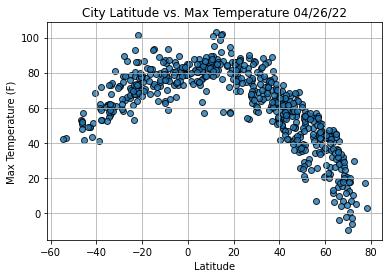

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

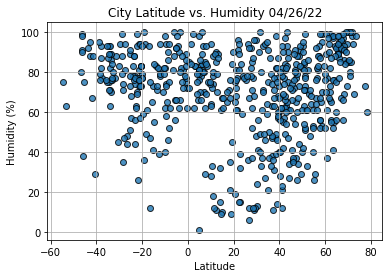

In [15]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

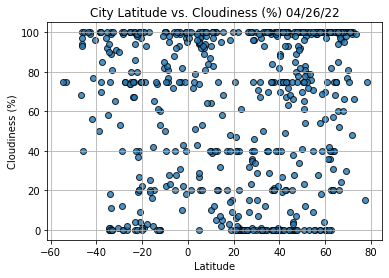

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

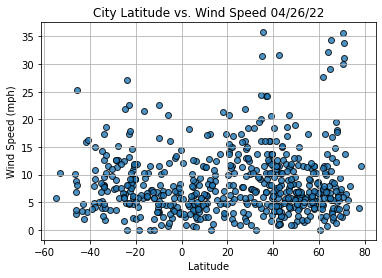

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()